# Import Libraries

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [18]:
np.random.seed(42)

In [19]:
import tensorflow as tf

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Data Pre-Processing

## Import Dataset

In [20]:
# import the DataSet
dt = pd.read_csv('Simulation_Training_Data.csv')

In [21]:
dt = dt.dropna(axis=1, how='any')
dt

,Configuration,Pressure,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS10DS10_0_1,0,-13.579100,-8.307888,-6.016057,-4.715443,-3.955701,-3.334041
1,DS10DS10_0_1,4,-13.579100,-8.307888,-5.786874,-4.418651,-3.589008,-2.836714
2,DS10DS10_0_1,8,-13.521804,-8.021409,-5.602381,-4.124150,-3.123766,-2.337095
3,DS10DS10_0_1,12,-13.464508,-7.964113,-5.397262,-3.788970,-2.722122,-1.830027
4,DS10DS10_0_1,16,-13.407212,-7.734930,-5.094741,-3.423423,-2.283237,-1.274831
...,...,...,...,...,...,...,...,...
3934,E30DS30_6_3,384,-4.012996,9.224621,19.136790,29.220848,39.190313,47.784680
3935,E30DS30_6_3,388,-3.951690,9.339212,19.365973,29.450031,39.476792,47.956567
3936,E30DS30_6_3,392,-4.008986,9.511099,19.595157,29.793805,39.648679,48.758708
3937,E30DS30_6_3,396,-4.008986,9.682987,19.824340,30.137580,40.909187,49.159779


## Dividing Data and Target Set

In [22]:
# Dividing Data and Target set
data = dt[dt.columns[1:]].to_numpy()
target = dt['Configuration'].to_numpy()
dt['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_2_0', 'DS10DS10_2_1', 'DS10DS10_3_0',
       'DS10DS10_3_1', 'DS10DS10_3_2', 'DS10DS10_6_1', 'DS10DS10_6_2',
       'DS10DS10_6_3', 'DS10DS30_2_1', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS30DS30_2_1', 'DS30DS30_3_1', 'DS30DS30_3_2', 'DS30DS30_6_0',
       'DS30DS30_6_1', 'DS30DS30_6_2', 'DS30DS30_6_3', 'DS30E30_1_1',
       'DS30E30_2_0', 'DS30E30_2_1', 'DS30E30_2_2', 'DS30E30_3_0',
       'DS30E30_3_1', 'DS30E30_3_2', 'DS30E30_3_3', 'DS30E30_6_1',
       'DS30E30_6_2', 'DS30E30_6_3', 'DS30E30_6_6', 'E30DS30_0_1',
       'E30DS30_2_1', 'E30DS30_3_1', 'E30DS30_3_2', 'E30DS30_6_0',
       'E30DS30_6_1', 'E30DS30_6_2', 'E30DS30_6_3'], dtype=object)

In [23]:
np.shape(dt['Configuration'].unique())

(39,)

In [24]:
print(np.shape(data))
print(np.shape(target))

(3939, 7)
(3939,)


## Decoding

In [25]:
from sklearn import preprocessing
from keras.utils import to_categorical

le = preprocessing.LabelEncoder()

categories = dt['Configuration'].unique()

# Fit the encoder to the categories and transform (encode) them
encoded_labels = le.fit_transform(categories)

# Now to decode, use inverse_transform
decoded_labels = le.inverse_transform(encoded_labels)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels)
print("Decoded Labels:", decoded_labels)


Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_3_2' 'DS10DS10_6_1' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_1' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_1' 'DS30E30_3_2'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_3' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_2_1' 'E30DS30_3_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_6_2' 'E30DS30_6_3']


## Label Encoding

In [26]:
# Label encoding

le.fit(target)
target_encoded = to_categorical(le.transform(target), 39) # Number has to be changed
np.shape(target_encoded)

(3939, 39)

In [27]:
target_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Split Train & Validation Set

In [28]:
# Shuffle the data and target
permutation = tf.random.shuffle(tf.range(tf.shape(data)[0]))
data_shuffled = tf.gather(data, permutation)
target_shuffled = tf.gather(target_encoded, permutation)

print(data_shuffled)
print(target_shuffled)

# Split train and Validation Set
train_data = data_shuffled
train_target = target_shuffled

tf.Tensor(
[[ 2.40000000e+02 -1.39801702e+01 -1.18029306e+01 ... -1.43812407e+01
  -1.64438887e+01 -1.90794946e+01]
 [ 8.80000000e+01 -1.10007897e+01 -3.07907519e+00 ...  6.01605685e+00
   1.00267614e+01  1.35218040e+01]
 [ 4.00000000e+01 -1.31780293e+01 -7.90681757e+00 ... -3.30138282e+00
  -1.97269369e+00 -1.12929981e+00]
 ...
 [ 2.24000000e+02 -1.04278319e+01 -9.48818109e-01 ...  1.22040010e+01
   1.78762832e+01  2.27464245e+01]
 [ 2.52000000e+02 -1.28915504e+01 -7.39115556e+00 ... -1.35046152e-01
   1.92628411e+00  3.84397385e+00]
 [ 7.60000000e+01 -1.32926209e+01 -9.51109940e+00 ... -7.73493023e+00
  -7.73493023e+00 -8.02140913e+00]], shape=(3939, 7), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(3939, 39), dtype=float64)


In [29]:
# Calculate the number of samples for validation set (20% of the data)\
num_val_samples = int(0.2 * int(tf.shape(data)[0]))

# Get the validation data and target
val_data = data_shuffled[:num_val_samples]
val_target = target_shuffled[:num_val_samples]

## Standardization

In [30]:
# Standarlization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
train_scaled = ss.transform(train_data)
val_scaled = ss.transform(val_data)
print("Train Scaled: ", train_scaled)
print()
print("Validation Scaled: ", val_scaled)
print()
print("Train Target: ", train_target)

Train Scaled:  [[ 0.34299717 -0.47234622 -0.63345086 ... -0.7105563  -0.71459774
  -0.72674329]
 [-0.96039208  0.51399311  0.56346753 ...  0.54473199  0.55801028
   0.57561572]
 [-1.37198868 -0.20679332 -0.09890173 ... -0.02868088 -0.01887781
  -0.00966763]
 ...
 [ 0.2057983   0.70367375  0.85574013 ...  0.92554978  0.93538539
   0.94412152]
 [ 0.44589632 -0.111953   -0.02815258 ...  0.16618147  0.16857019
   0.18900507]
 [-1.06329123 -0.24472945 -0.3190102  ... -0.30152978 -0.29590419
  -0.2849941 ]]

Validation Scaled:  [[ 0.34299717 -0.47234622 -0.63345086 ... -0.7105563  -0.71459774
  -0.72674329]
 [-0.96039208  0.51399311  0.56346753 ...  0.54473199  0.55801028
   0.57561572]
 [-1.37198868 -0.20679332 -0.09890173 ... -0.02868088 -0.01887781
  -0.00966763]
 ...
 [-1.4062884  -0.33956977 -0.1775119  ... -0.09169212 -0.08617178
  -0.07451091]
 [-0.13719887  0.17256796  0.60654591 ...  0.55883635  0.53321922
   0.54357174]
 [ 0.44589632 -1.30694103 -1.12869492 ... -1.18305245 -1.20490

In [31]:
print(train_scaled.shape, train_target.shape)

(3939, 7) (3939, 39)


# Create FNN Model

In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('/content/my_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [33]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=7, activation=keras.layers.LeakyReLU(alpha=0.01))) # Number need to be changed depend on training data columns
model.add(Dropout(0.2))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(39, activation='softmax')) # Number has to be changed depends on .unique()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile model
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Model Fit
history = model.fit(train_scaled, train_target, epochs=50,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0564 - loss: 3.3669 - val_accuracy: 0.1271 - val_loss: 2.7509
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1901 - loss: 2.5937 - val_accuracy: 0.3024 - val_loss: 2.1666
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3063 - loss: 2.0862 - val_accuracy: 0.3672 - val_loss: 1.8245
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3906 - loss: 1.8027 - val_accuracy: 0.4930 - val_loss: 1.6012
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4470 - loss: 1.6136 - val_accuracy: 0.5375 - val_loss: 1.4388
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4862 - loss: 1.4857 - val_accuracy: 0.5959 - val_loss: 1.3159
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5158 - loss: 1.3896 - val_accuracy: 0.6137 - val_loss: 1.2259
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5465 - loss: 1.3107 - val_accuracy:

# Model Evaluation and Summary

In [36]:
# Evaluating the model
model.evaluate(val_scaled, val_target)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.3221 


[0.3258189558982849, 0.9123252630233765]

In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


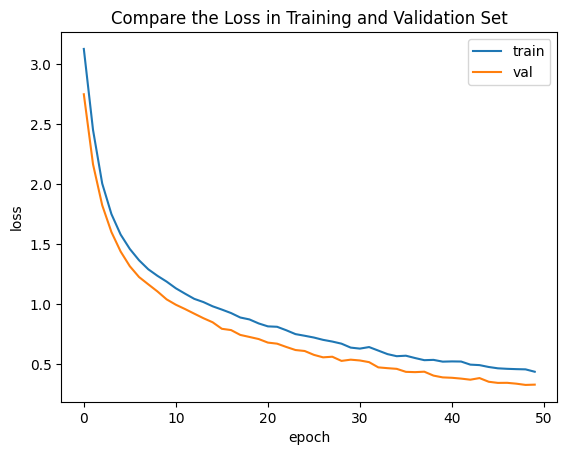

In [38]:
# Plot Loss of both training and validation set
import matplotlib.pyplot as plt

plt.title('Compare the Loss in Training and Validation Set')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

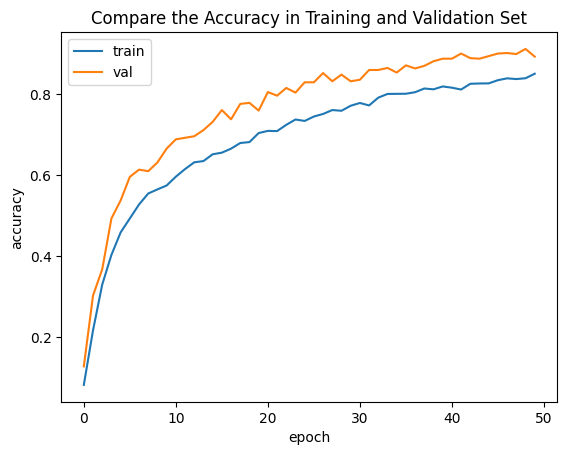

In [39]:
# Plot Loss of both training and validation set

plt.title('Compare the Accuracy in Training and Validation Set')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 39)                  │           3,939 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,007 (695.34 KB)

 Trainable params: 59,335 (231.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 118,672 (463.57 KB)

## R-sqaured value, MSE, RMSE, MAE

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict the trainig & validation data
y_pred_train = model.predict(train_scaled)
y_pred_val = model.predict(val_scaled)

# Calculate the R-squared value
r2_train = r2_score(train_target, y_pred_train)
r2_val = r2_score(val_target, y_pred_val)

# Calculate the mean squared error
mse_train = mean_squared_error(train_target, y_pred_train)
mse_val = mean_squared_error(val_target, y_pred_val)

# Calculate the root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

# Calculate the mean absolute error
mae_train = mean_absolute_error(train_target, y_pred_train)
mae_val = mean_absolute_error(val_target, y_pred_val)

# Print the results
print("R-squared for Train Model:", r2_train)
print("R-squared for Validation Model:", r2_val)
print()

print("MSE for Train Model:", mse_train)
print("MSE for Validation Model:", mse_val)
print()

print("RMSE for Train Model:", rmse_train)
print("RMSE for Validation Model:", rmse_val)
print()

print("MAE for Train Model:", mae_train)
print("MAE for Validation Model:", mae_val)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-squared for Train Model: 0.8453508295782916
R-squared for Validation Model: 0.8449599275841921

MSE for Train Model: 0.0038636873609628505
MSE for Validation Model: 0.003777606686896966

RMSE for Train Model: 0.062158566271776655
RMSE for Validation Model: 0.061462237893660905

MAE for Train Model: 0.010663698380924827
MAE for Validation Model: 0.010395302665422611


## Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
predictions = model.predict(val_scaled)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert target labels back to original labels
predicted_labels = le.inverse_transform(predicted_labels)

# Get true labels
true_labels = np.argmax(val_target, axis=1)
true_labels = le.inverse_transform(true_labels)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to show values between 0 and 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print normalized confusion matrix
print(cm_normalized)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decoded_labels)
fig, ax = plt.subplots(figsize=(102,102))
disp.plot(ax=ax, cmap='viridis', values_format='.2f', colorbar=False) # Disable the automatic color bar
ax.set_title('Confusion Matrix for Simulation', fontsize = 250, fontweight = 'bold')  # Set the title font
ax.set_xlabel('Predicted Configurations', fontsize = 150, fontweight = 'bold')  # Set the x-axis label
ax.set_ylabel('True Configurations', fontsize = 150, fontweight = 'bold')       # Set the y-axis label

# Remove the text from the matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.texts[i * cm.shape[1] + j].set_visible(False)

# Hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a single color bar
cbar = fig.colorbar(disp.im_, ax=ax)
cbar.ax.set_ylabel('Normalized Value', rotation=-90, va="bottom", fontsize=150, fontweight = 'bold')  # Increase font size of the color bar label
cbar.ax.tick_params(labelsize=40)  # Increase font size of the color bar ticks

plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0.96875 0.      0.      ... 0.      0.      0.03125]
 [0.      1.      0.      ... 0.      0.      0.     ]
 [0.      0.      1.      ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 1.      0.      0.     ]
 [0.      0.      0.      ... 0.      1.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.9375 ]]


# Validating FNN Model

## Taking Training Data to Validate

In [43]:
# import the DataSet
dt_1 = pd.read_csv('Simulation_Training_Data.csv')

dt_1 = dt_1.dropna(axis=1, how='any')

# Dividing Data and Target set
data2val = dt_1[dt_1.columns[1:]].to_numpy()
target2val = dt_1['Configuration'].to_numpy()
dt_1['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_2_0', 'DS10DS10_2_1', 'DS10DS10_3_0',
       'DS10DS10_3_1', 'DS10DS10_3_2', 'DS10DS10_6_1', 'DS10DS10_6_2',
       'DS10DS10_6_3', 'DS10DS30_2_1', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS30DS30_2_1', 'DS30DS30_3_1', 'DS30DS30_3_2', 'DS30DS30_6_0',
       'DS30DS30_6_1', 'DS30DS30_6_2', 'DS30DS30_6_3', 'DS30E30_1_1',
       'DS30E30_2_0', 'DS30E30_2_1', 'DS30E30_2_2', 'DS30E30_3_0',
       'DS30E30_3_1', 'DS30E30_3_2', 'DS30E30_3_3', 'DS30E30_6_1',
       'DS30E30_6_2', 'DS30E30_6_3', 'DS30E30_6_6', 'E30DS30_0_1',
       'E30DS30_2_1', 'E30DS30_3_1', 'E30DS30_3_2', 'E30DS30_6_0',
       'E30DS30_6_1', 'E30DS30_6_2', 'E30DS30_6_3'], dtype=object)

In [44]:
# Standarlization
data2val_scaled = ss.transform(data2val)

# Prediction
pred2val = model.predict(data2val_scaled)
pred2val

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.6890502e-01, 2.4935141e-06, 5.3820575e-08, ..., 2.0659367e-04,
        2.9127919e-03, 2.9606263e-03],
       [3.1809178e-01, 1.3205814e-06, 4.8757830e-08, ..., 3.6021954e-06,
        1.3746716e-04, 2.3556656e-04],
       [4.2831129e-01, 5.2486222e-08, 1.5989250e-10, ..., 8.0801992e-06,
        5.7768804e-04, 5.7631347e-04],
       ...,
       [5.3261741e-13, 0.0000000e+00, 0.0000000e+00, ..., 1.3068841e-17,
        8.6020442e-16, 1.0000000e+00],
       [1.8885017e-12, 0.0000000e+00, 0.0000000e+00, ..., 4.9773585e-17,
        2.6092742e-15, 1.0000000e+00],
       [6.7604272e-13, 0.0000000e+00, 0.0000000e+00, ..., 6.9401471e-18,
        8.0870100e-16, 1.0000000e+00]], dtype=float32)

In [45]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val)):
    maxarg2val = np.argmax(pred2val[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val)

[0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [46]:
# prompt: also show how many percent are the same and how many percent are the different

# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 91.06372175679105%
Incorrect: 8.936278243208946%


## Validating with Altifically Made Error

### With 1% error dataset

In [47]:
# Increase the whole data by 1%
data2val_1percent = data2val * 1.01

# Standarlization
data2val_1percent_scaled = ss.transform(data2val_1percent)

# Prediction
pred2val_1percent = model.predict(data2val_1percent_scaled)
pred2val_1percent

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[7.9405852e-02, 1.1359078e-04, 4.4297620e-05, ..., 7.7594530e-07,
        2.0076215e-05, 2.9715153e-05],
       [1.6035387e-01, 4.2546271e-05, 3.2274838e-05, ..., 1.1969276e-08,
        1.0507080e-06, 2.7697363e-06],
       [3.0680463e-01, 1.6062585e-06, 9.2130250e-08, ..., 3.9790969e-08,
        7.0213769e-06, 1.0321494e-05],
       ...,
       [1.3859173e-12, 0.0000000e+00, 0.0000000e+00, ..., 2.3848489e-17,
        2.2100064e-15, 1.0000000e+00],
       [4.9623465e-12, 0.0000000e+00, 0.0000000e+00, ..., 9.1864919e-17,
        6.7577254e-15, 9.9999988e-01],
       [1.7626929e-12, 0.0000000e+00, 0.0000000e+00, ..., 1.2603566e-17,
        2.0708649e-15, 1.0000000e+00]], dtype=float32)

In [48]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_1percent)):
    maxarg2val = np.argmax(pred2val_1percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_1percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_1percent)

[4, 11, 0, 0, 0, 32, 0, 16, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,

In [49]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_1percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_1percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_1percent = 100 - accuracy_percent_1percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_1percent))
print("Incorrect: {}%".format(incorrect_percent_1percent))

Accuracy: 84.41228738258442%
Incorrect: 15.587712617415576%


### With 2% error dataset

In [50]:
# Increase the whole data by 2%
data2val_2percent = data2val * 1.02

# Standarlization
data2val_2percent_scaled = ss.transform(data2val_2percent)

# Prediction
pred2val_2percent = model.predict(data2val_2percent_scaled)
pred2val_2percent

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.9726757e-02, 2.9210711e-03, 5.8947527e-03, ..., 1.8852753e-09,
        7.3409232e-08, 2.2743606e-07],
       [3.3884592e-02, 6.9787935e-04, 4.6426076e-03, ..., 2.7844402e-11,
        4.2021751e-09, 2.2875838e-08],
       [6.5690242e-02, 1.7390301e-05, 1.4533868e-05, ..., 7.0883528e-11,
        3.0037384e-08, 7.4029330e-08],
       ...,
       [3.5981435e-12, 0.0000000e+00, 0.0000000e+00, ..., 4.3488710e-17,
        5.6578481e-15, 1.0000000e+00],
       [1.4737463e-11, 0.0000000e+00, 0.0000000e+00, ..., 2.2103842e-16,
        2.7129063e-14, 9.9999976e-01],
       [4.9696783e-12, 0.0000000e+00, 0.0000000e+00, ..., 2.7168693e-17,
        7.0759066e-15, 1.0000000e+00]], dtype=float32)

In [51]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_2percent)):
    maxarg2val = np.argmax(pred2val_2percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_2percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_2percent)

[12, 11, 11, 11, 11, 32, 32, 16, 0, 0, 0, 0, 0, 32, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_2percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_2percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_2percent = 100 - accuracy_percent_2percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_2percent))
print("Incorrect: {}%".format(incorrect_percent_2percent))

Accuracy: 69.71312515866971%
Incorrect: 30.286874841330288%


### With 5% error dataset

In [53]:
# Increase the whole data by 2%
data2val_5percent = data2val * 1.05

# Standarlization
data2val_5percent_scaled = ss.transform(data2val_5percent)

# Prediction
pred2val_5percent = model.predict(data2val_5percent_scaled)
pred2val_5percent

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2.1582340e-04, 4.4839823e-01, 7.0379384e-02, ..., 6.9757271e-16,
        5.4969768e-14, 1.2843470e-12],
       [2.6737823e-04, 7.7844903e-02, 9.4746836e-02, ..., 1.4388898e-17,
        6.1149231e-15, 1.7954747e-13],
       [7.3180767e-04, 1.9461652e-03, 1.1903792e-02, ..., 1.7300722e-17,
        2.9762220e-14, 5.8925916e-13],
       ...,
       [9.4928364e-11, 0.0000000e+00, 0.0000000e+00, ..., 5.3392944e-16,
        3.7222477e-13, 9.9999940e-01],
       [4.3716880e-10, 0.0000000e+00, 0.0000000e+00, ..., 2.9488929e-15,
        2.1570807e-12, 9.9999750e-01],
       [1.3895893e-10, 0.0000000e+00, 0.0000000e+00, ..., 3.3473940e-16,
        5.2124152e-13, 9.9999940e-01]], dtype=float32)

In [54]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_5percent)):
    maxarg2val = np.argmax(pred2val_5percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_5percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_5percent)

[1, 12, 12, 18, 11, 11, 11, 10, 32, 32, 32, 32, 32, 32, 11, 32, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_5percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_5percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_5percent = 100 - accuracy_percent_5percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_5percent))
print("Incorrect: {}%".format(incorrect_percent_5percent))

Accuracy: 38.56308707793856%
Incorrect: 61.43691292206144%


### Accuracy for with 0%, 1%, 2%, 5% error

In [56]:
print("0% Accuracy: {}%".format(accuracy_percent))
print("1% Accuracy: {}%".format(accuracy_percent_1percent))
print("2% Accuracy: {}%".format(accuracy_percent_2percent))
print("5% Accuracy: {}%".format(accuracy_percent_5percent))

0% Accuracy: 91.06372175679105%
1% Accuracy: 84.41228738258442%
2% Accuracy: 69.71312515866971%
5% Accuracy: 38.56308707793856%


## Using only Theata 6 and Validate

In [57]:
# import the DataSet
dt_new = pd.read_csv('Predicted_Thetas.csv')

dt_new = dt_new.dropna()
dt_new

,Configuration,Pressure,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS10DS10_0_1,0,-13.545841,-8.440599,-6.108267,-4.785150,-3.922909,-3.334041
1,DS10DS10_0_1,4,-13.464267,-8.272068,-5.859018,-4.447139,-3.495948,-2.836714
2,DS10DS10_0_1,8,-13.383991,-8.104501,-5.609868,-4.108945,-3.068310,-2.337095
3,DS10DS10_0_1,12,-13.304292,-7.936287,-5.358333,-3.767124,-2.635602,-1.830027
4,DS10DS10_0_1,16,-13.220044,-7.755211,-5.085252,-3.394993,-2.163616,-1.274831
...,...,...,...,...,...,...,...,...
3934,E30DS30_6_3,384,-6.054122,7.700218,19.220349,29.191341,39.444129,47.784680
3935,E30DS30_6_3,388,-6.012885,7.774368,19.322903,29.308227,39.603521,47.956567
3936,E30DS30_6_3,392,-5.893702,8.043297,19.720006,29.835276,40.287439,48.758708
3937,E30DS30_6_3,396,-5.824818,8.188371,19.928818,30.099536,40.636757,49.159779


In [58]:
# Dividing Data and Target set
data_new = dt_new[dt_new.columns[1:]].to_numpy()
target_new = dt_new['Configuration'].to_numpy()
dt_new['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_2_0', 'DS10DS10_2_1', 'DS10DS10_3_0',
       'DS10DS10_3_1', 'DS10DS10_3_2', 'DS10DS10_6_1', 'DS10DS10_6_2',
       'DS10DS10_6_3', 'DS10DS30_2_1', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS30DS30_2_1', 'DS30DS30_3_1', 'DS30DS30_3_2', 'DS30DS30_6_0',
       'DS30DS30_6_1', 'DS30DS30_6_2', 'DS30DS30_6_3', 'DS30E30_1_1',
       'DS30E30_2_0', 'DS30E30_2_1', 'DS30E30_2_2', 'DS30E30_3_0',
       'DS30E30_3_1', 'DS30E30_3_2', 'DS30E30_3_3', 'DS30E30_6_1',
       'DS30E30_6_2', 'DS30E30_6_3', 'DS30E30_6_6', 'E30DS30_0_1',
       'E30DS30_2_1', 'E30DS30_3_1', 'E30DS30_3_2', 'E30DS30_6_0',
       'E30DS30_6_1', 'E30DS30_6_2', 'E30DS30_6_3'], dtype=object)

In [59]:
# Standardization
data_new_scaled = ss.transform(data_new)

# Prediction
data_new_predicted = model.predict(data_new_scaled)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [60]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(data_new_predicted)):
    maxarg2val = np.argmax(data_new_predicted[i])
    maxarg2val_list.append(maxarg2val)

## print(maxarg2val_list)
decoded_pred_new = le.inverse_transform(maxarg2val_list)
print(decoded_pred_new[:10])

['DS30E30_2_1' 'DS10DS10_0_1' 'DS10DS30_3_1' 'DS10DS30_3_1' 'DS10DS10_0_1'
 'DS10DS10_0_1' 'DS10DS10_0_1' 'DS10DS10_0_1' 'DS10DS10_0_1'
 'DS10DS10_0_1']


In [61]:
# Find Accuracy

count = 0
for i in range(len(target_new)):
    if target_new[i] == decoded_pred_new[i]:
        count = count + 1

print("Accuracy = ", count/len(target_new))

Accuracy =  0.3427265803503427


In [62]:
# Compare

confi = target_new
thet = dt_new[dt_new.columns[1:]]

index_list = []
for i in range(len(target_new)):
    if target_new[i] != decoded_pred_new[i]:
        index_list.append(i)

configuration = pd.DataFrame(decoded_pred_new, columns=['Configuration'])
dataSet = pd.concat([configuration, dt_new['Pressure']], axis=1)
dataSet

,Configuration,Pressure
0,DS30E30_2_1,0
1,DS10DS10_0_1,4
2,DS10DS30_3_1,8
3,DS10DS30_3_1,12
4,DS10DS10_0_1,16
...,...,...
3934,E30DS30_3_2,384
3935,E30DS30_3_2,388
3936,E30DS30_3_2,392
3937,E30DS30_3_2,396


In [63]:
merged_data = pd.merge(dt_1, dataSet, on=['Configuration', 'Pressure'], how='right')
predicted_file = merged_data[['Configuration', 'Pressure', 'Theta2', 'Theta3', 'Theta4', 'Theta5', 'Theta6']]
predicted_file.to_csv('Predicted_file.csv', encoding='utf-8', index=False)
predicted_file

,Configuration,Pressure,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS30E30_2_1,0,-8.422480,-6.130648,-4.846650,-3.838244,-3.305394
1,DS10DS10_0_1,4,-8.307888,-5.786874,-4.418651,-3.589008,-2.836714
2,DS10DS30_3_1,8,-8.193296,-5.786874,-4.256503,-3.237212,-2.521014
3,DS10DS30_3_1,12,-8.021409,-5.601808,-3.996381,-2.907188,-2.121663
4,DS10DS10_0_1,16,-7.734930,-5.094741,-3.423423,-2.283237,-1.274831
...,...,...,...,...,...,...,...
3934,E30DS30_3_2,384,9.568395,22.975608,33.632623,44.690708,54.029920
3935,E30DS30_3_2,388,9.682987,23.032903,34.033693,45.034483,54.545582
3936,E30DS30_3_2,392,9.912170,23.376678,34.434763,45.435553,55.003948
3937,E30DS30_3_2,396,10.084057,23.720453,34.663947,45.836624,55.405019


In [64]:
err = (dt_1['Theta6'] - predicted_file['Theta6'])
err.to_csv('Error.csv', encoding='utf-8', index=False)

In [65]:
err

,Theta6
0,-0.028648
1,0.000000
2,0.183919
3,0.291636
4,0.000000
...,...
3934,-6.245240
3935,-6.589015
3936,-6.245240
3937,-6.245240


In [66]:
count_2_5 = 0
count_5 = 0
count_7_5 = 0
count_10 = 0

for i in range(len(err)):
  if err[i] <= 2.5 and err[i] >= -2.5:
    count_2_5 = count_2_5 + 1

for i in range(len(err)):
  if err[i] <= 5 and err[i] >= -5:
    count_5 = count_5 + 1

for i in range(len(err)):
  if err[i] <= 7.5 and err[i] >= -7.5:
    count_7_5 = count_7_5 + 1

for i in range(len(err)):
  if err[i] <= 10 and err[i] >= -10:
    count_10 = count_10 + 1

print("Within 2.5 degree: ", count_2_5/len(err)*100)
print("Within 5 degree: ", count_5/len(err)*100)
print("Within 7.5 degree: ", count_7_5/len(err)*100)
print("Within 10 degree: ", count_10/len(err)*100)

Within 2.5 degree:  88.98197512058898
Within 5 degree:  97.81670474739782
Within 7.5 degree:  99.74612845899975
Within 10 degree:  99.97461284589998


## With Random Data (Close to the Configuration on the LEFT)

In [67]:
# Import the DataSet
rndConfi = pd.read_csv('5_Randomly_Selected_Configurations.csv')

rndConfi = rndConfi.dropna()

# Dividing Data and Target set
data_rnd = rndConfi[rndConfi.columns[1:]].to_numpy()
target_rnd = rndConfi['Configuration'].to_numpy()
rndConfi['Configuration'].unique()

array(['E30DS30_6_3_VS_DS10DS10_0_1', 'DS10DS10_0_1_VS_DS30DS30_6_1',
       'DS30DS30_6_1_VS_DS10DS30_3_1', 'DS10DS30_3_1_VS_DS10DS30_2_1'],
      dtype=object)

In [68]:
np.shape(data_rnd)

(404, 7)

In [69]:
# Standarlization
data_rnd_scaled = ss.transform(data_rnd)

# Prediction
pred2rnd = model.predict(data_rnd_scaled)
pred2rnd

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1.4747736e-02, 7.0924971e-10, 1.4402666e-13, ..., 4.2604983e-02,
        6.8546399e-02, 9.5451474e-02],
       [3.4512360e-02, 3.9939230e-10, 5.1955720e-14, ..., 6.1929552e-03,
        1.5285890e-02, 3.1329304e-02],
       [5.6493245e-02, 1.3791787e-10, 5.9493239e-15, ..., 7.2466573e-03,
        4.1335654e-02, 5.1444206e-02],
       ...,
       [3.4566256e-06, 9.4048695e-17, 0.0000000e+00, ..., 0.0000000e+00,
        3.3017910e-21, 1.4890594e-18],
       [5.4716297e-06, 4.5460407e-17, 0.0000000e+00, ..., 0.0000000e+00,
        2.7864490e-21, 6.4511014e-18],
       [5.1736010e-06, 3.7370144e-17, 0.0000000e+00, ..., 0.0000000e+00,
        1.6010432e-21, 3.9599816e-18]], dtype=float32)

In [70]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2rnd)):
    maxarg2val = np.argmax(pred2rnd[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2rnd = le.inverse_transform(maxarg2val_list)
print(decoded_pred2rnd)

[31, 10, 10, 31, 31, 16, 16, 38, 38, 31, 38, 37, 34, 37, 34, 38, 38, 38, 38, 37, 38, 37, 38, 38, 38, 38, 38, 38, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 34, 38, 38, 38, 38, 38, 38, 34, 38, 38, 38, 38, 38, 38, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 6, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 10, 10, 10, 10, 10, 10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

In [71]:
np.shape(decoded_pred2rnd)

(404,)

### Save results in an excel

In [72]:
# Create a Pandas DataFrame
df = pd.DataFrame(decoded_pred2rnd)

# Export the DataFrame to an Excel file
df.to_excel('decoded_pred2rnd.xlsx', sheet_name='Sheet1')

### Check Accuracy

In [73]:
# To count how many correct predictions

count_E30DS30_6_3 = 0
count_DS10DS10_0_1 =0
count_DS30DS30_6_1 = 0
count_DS10DS30_3_1 = 0

In [74]:
for i in range(404):
  if i < 101:
    if decoded_pred2rnd[i]  == "E30DS30_6_3":
      count_E30DS30_6_3 = count_E30DS30_6_3 + 1
  if i in range(102,202):
    if decoded_pred2rnd[i]  == "DS10DS10_0_1":
      count_DS10DS10_0_1 = count_DS10DS10_0_1 + 1
  if i in range(203,303):
    if decoded_pred2rnd[i]  == "DS30DS30_6_1":
      count_DS30DS30_6_1 = count_DS30DS30_6_1 + 1
  if i in range(304,404):
    if decoded_pred2rnd[i]  == "DS10DS30_3_1":
      count_DS10DS30_3_1 = count_DS10DS30_3_1 + 1

In [75]:
accuracy_E30DS30_6_3_VS_DS10DS10_0_1 = (count_E30DS30_6_3 / 101) * 100
accuracy_DS10DS10_0_1_VS_DS30DS30_6_1 = (count_DS10DS10_0_1 / 101) * 100
accuracy_DS30DS30_6_1_VS_DS10DS30_3_1 = (count_DS30DS30_6_1 / 101) * 100
accuracy_DS10DS30_3_1_VS_DS10DS30_2_1 = (count_DS10DS30_3_1 / 101) * 100

In [76]:
print("E30DS30_6_3_VS_DS10DS10_0_1 Accuracy: {}%".format(accuracy_E30DS30_6_3_VS_DS10DS10_0_1))
print("DS10DS10_0_1_VS_DS30DS30_6_1 Accuracy: {}%".format(accuracy_DS10DS10_0_1_VS_DS30DS30_6_1))
print("DS30DS30_6_1_VS_DS10DS30_3_1 Accuracy: {}%".format(accuracy_DS30DS30_6_1_VS_DS10DS30_3_1))
print("DS10DS30_3_1_VS_DS10DS30_2_1 Accuracy: {}%".format(accuracy_DS10DS30_3_1_VS_DS10DS30_2_1))

E30DS30_6_3_VS_DS10DS10_0_1 Accuracy: 82.17821782178217%
DS10DS10_0_1_VS_DS30DS30_6_1 Accuracy: 98.01980198019803%
DS30DS30_6_1_VS_DS10DS30_3_1 Accuracy: 93.06930693069307%
DS10DS30_3_1_VS_DS10DS30_2_1 Accuracy: 99.00990099009901%
